# p-Bits 101

This is a series of notebooks which elaborates on the algorithmic aspects of probabilistic computing, which has emerged as an alternative computing technology in the last 5 years. Probabilistic computing is a descendant of stochastic computing - although, the two shouldn't be confused.

Stochastic computing involves the use of uniform random bit-streams in conventional logic gates to arrive at analogues of computation - like flipping two coins and counting the pair of heads relative to coin flips and calling this multiplication of the two probabilities of a head on each individual coin.

Probabilistic computing on the other hand, relies on p-bits, tunable noise sources that interact via an Ising model to create what are effectively small Boltzmann machines which can be thought of as "invertible" logic gates that form invertible logic circuits.

The behaviour of a p-bit is described with the following equation:

$$m = \text{sgn}(U(-1,+1)+\tanh(a))$$

Where $m$ is the final state of the $m$, $sgn$ is the "sign" function, $U(-1,+1)$ represents the uniform probability between in the interval $(-1,+1)$ and $a$ is an activation term.

Below, we'll define a simple p-bit and the change its activation to demonstrate its behaviour clearly:

1


<BarContainer object of 2 artists>

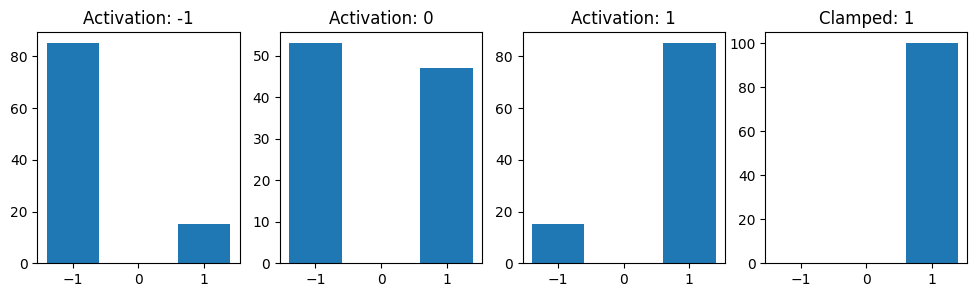

In [5]:
from random import uniform
from math import tanh
import matplotlib.pyplot as plt

class pbit():

    def __init__(self, clamped=None):

        self.activation = 0
        self.clamped = None 
        if clamped != None:
            self.clamped = clamped
    
    def sample(self):
        if self.clamped != None:
            return self.clamped
        return self.__sgn(uniform(-1,1)+tanh(self.activation))

    def __sgn(self,i):
        if i <= 0:
            return -1
        return 1

fig,axs = plt.subplots(1,4,figsize=(12,3))
num_samples = 100

# Iterate through a few different activation values
for i in range(3):
    samples = []

    my_first_pbit = pbit()
    my_first_pbit.activation = -1 + i

    for j in range(num_samples):
        samples.append(my_first_pbit.sample())

    val = sum([s < 0 for s in samples])

    axs[i].set_title(f"Activation: {-1+i}")
    axs[i].bar([-1,1],[val,num_samples-val])

# Just a quick example to explain clamping behaviour
samples = []
my_first_pbit = pbit(1)
print(my_first_pbit.clamped)
for j in range(num_samples):
    samples.append(my_first_pbit.sample())

val = sum([s < 0 for s in samples])

axs[3].set_title(f"Clamped: {1}")
axs[3].bar([-1,1],[val,num_samples-val])
